In [1]:
#importar los paquetes que se van a usar
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like# hack para que jale pd data reader
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl
# closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2019-01-18,2.5,call,AAPL190118C00002500,...,2018-11-02 20:00:02,2018-10-15 19:47:03,"{'contractSymbol': 'AAPL190118C00002500', 'str..."
2019-04-18,2.5,call,AAPL190418C00002500,...,2018-11-02 20:00:02,2018-09-22 03:52:17,"{'contractSymbol': 'AAPL190418C00002500', 'str..."
2019-01-18,5.0,call,AAPL190118C00005000,...,2018-11-02 20:00:02,2018-09-08 03:58:48,"{'contractSymbol': 'AAPL190118C00005000', 'str..."
2019-01-18,7.5,put,AAPL190118P00007500,...,2018-11-02 20:00:02,2018-09-22 03:52:38,"{'contractSymbol': 'AAPL190118P00007500', 'str..."
2019-01-18,10.0,call,AAPL190118C00010000,...,2018-11-02 20:00:02,2018-10-30 19:29:06,"{'contractSymbol': 'AAPL190118C00010000', 'str..."
...,...,...,...,...,...,...,...
2019-04-18,410.0,call,AAPL190418C00410000,...,2018-11-02 20:00:02,2018-10-18 15:46:39,"{'contractSymbol': 'AAPL190418C00410000', 'str..."
2019-04-18,420.0,call,AAPL190418C00420000,...,2018-11-02 20:00:02,2018-10-26 14:59:37,"{'contractSymbol': 'AAPL190418C00420000', 'str..."
2019-04-18,420.0,put,AAPL190418P00420000,...,2018-11-02 20:00:02,2018-11-02 14:23:03,"{'contractSymbol': 'AAPL190418P00420000', 'str..."


In [3]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()

In [4]:
put06 = aapl_opt.loc[(aapl_opt.Expiry=='2019-04-18') & (aapl_opt.Type=='put')]

In [5]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_historical_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

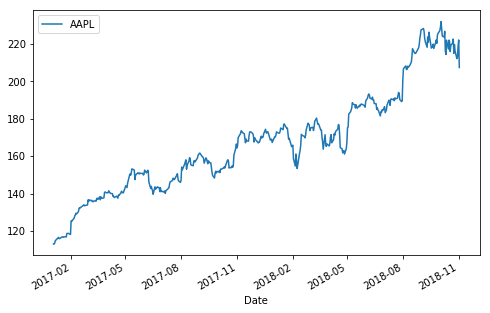

In [6]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_historical_closes(ticker, start_date,freq='d')
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [7]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

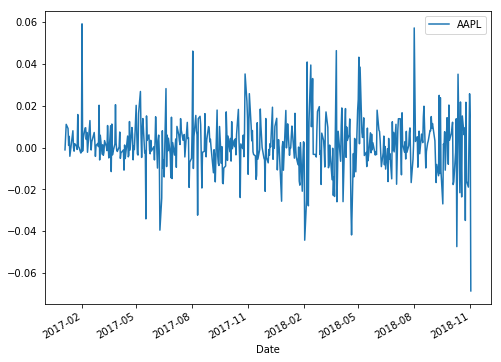

In [8]:
#RENDIMIENTOS DE APPLE
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

## 1 EMPEZAMOS CALCULANDO LA OPCON CONSULTANDO LOS DATOS QUE DA YAHOO FINANCE

In [9]:
aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==220) & (aapl_opt.Expiry=='2019-02-15')]
#quiero caluar una opcion put en 220 USD PARA EL 15 DE FEBRERO DE 2019, LAS ACCIONES DE APPLE CUESTAN 207 USD01-11-2018

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
537,220.0,2019-02-15,put,...,2018-11-02 20:00:02,2018-11-02 19:29:46,"{'contractSymbol': 'AAPL190215P00220000', 'str..."


In [10]:
opcion_valuar = aapl_opt.loc[537]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL190215P00220000',
 'strike': 220.0,
 'currency': 'USD',
 'lastPrice': 20.99,
 'change': 8.19,
 'percentChange': 39.018578,
 'volume': 167,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1550188800,
 'lastTradeDate': 1541186986,
 'impliedVolatility': 1.0000000000000003e-05,
 'inTheMoney': True}

# Simulación de precios usando rendimiento simple y logarítmico 
* Comenzaremos por suponer que los rendimientos son un p.e. estacionario que distribuyen $\mathcal{N}(\mu,\sigma)$.

In [11]:
# Descargamos los precios de apple
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_historical_closes(ticker, start_date,freq='d')
closes_aapl

,AAPL
Date,
2017-01-03,113.014
2017-01-04,112.887
2017-01-05,113.462
2017-01-06,114.726
2017-01-09,115.777
...,...
2018-10-29,212.240
2018-10-30,213.300
2018-10-31,218.860


In [12]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri


,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2018-10-29,-0.019
2018-10-30,0.005
2018-10-31,0.026


In [13]:
ndays = 109
nscen = 10
dates = pd.date_range('2018-11-05', periods = ndays)
dates

DatetimeIndex(['2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-10', '2018-11-11', '2018-11-12',
               '2018-11-13', '2018-11-14',
               ...
               '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15',
               '2019-02-16', '2019-02-17', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21'],
              dtype='datetime64[ns]', length=109, freq='D')

In [14]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,7,8,9
2018-11-05,1.686e-03,1.615e-02,-2.085e-02,...,-9.998e-03,-6.969e-04,1.711e-02
2018-11-06,-1.900e-05,-2.923e-04,-4.557e-04,...,1.630e-04,5.652e-06,8.090e-05
2018-11-07,-1.849e-07,1.333e-06,-2.096e-06,...,1.098e-06,1.770e-08,-4.009e-07
2018-11-08,-2.477e-09,-1.220e-08,3.493e-09,...,2.193e-09,-1.857e-11,-2.289e-09
2018-11-09,-7.661e-13,3.637e-11,3.455e-11,...,3.541e-11,-1.516e-13,2.248e-11
...,...,...,...,...,...,...,...
2019-02-17,3.168e-221,1.568e-228,-2.346e-231,...,-8.897e-230,4.999e-222,-2.826e-218
2019-02-18,-3.524e-223,-1.234e-230,3.835e-233,...,-2.557e-233,1.004e-224,-1.296e-220
2019-02-19,2.884e-225,-8.647e-233,-2.180e-235,...,-3.704e-236,1.302e-227,3.082e-222
2019-02-20,1.047e-226,8.327e-235,7.535e-238,...,2.226e-238,3.809e-229,3.240e-224


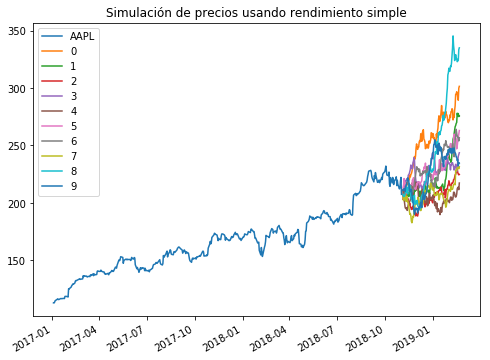

In [15]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

- **Rendimiento logarítmico**

,0,1,2,...,7,8,9
2018-11-05,0.019,-3.771e-03,-0.032,...,0.006,0.019,-0.007
2018-11-06,0.021,-2.403e-02,-0.057,...,-0.007,0.028,0.011
2018-11-07,0.033,-8.589e-03,-0.039,...,0.008,0.047,0.026
2018-11-08,0.037,-9.809e-04,-0.021,...,0.027,0.065,0.044
2018-11-09,0.057,1.579e-02,-0.010,...,0.023,0.080,0.050
...,...,...,...,...,...,...,...
2019-02-17,-0.090,-1.060e-01,0.470,...,0.093,-0.915,-0.236
2019-02-18,-0.085,-9.152e-02,0.447,...,0.114,-0.887,-0.216
2019-02-19,-0.071,-7.129e-02,0.460,...,0.135,-0.858,-0.264
2019-02-20,-0.225,-6.187e-02,0.476,...,0.149,-0.981,-0.255


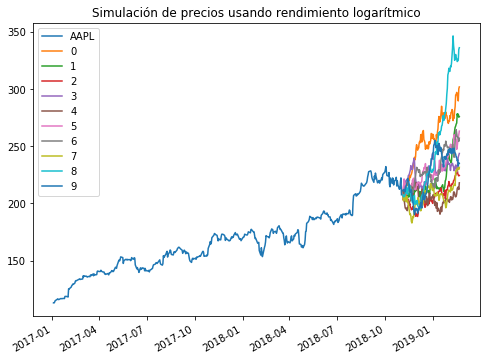

In [16]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)
# sim_ret_ri
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');
S_T-S_T2

In [17]:
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son iguales


(0.013555054847592646, 0.013537847782589606)

## 2. Valuación usando simulación: modelo normal para los rendimientos

- Hallar media y desviación estándar muestral de los rendimientos logarítmicos

In [18]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0013121468005006648, 0.013537847782589606)

No se toma la media sino la tasa libre de riesgo
Referencia: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [19]:
# Tasa de bonos de 1 yr de fecha 10/01/18 -> 2.60%
r = 0.0260/360 # Tasa diaria

- Simularemos el tiempo de contrato (días=109) desde 29/10/18 hasta 15/02/19, 10 escenarios:
> Calculador de fechas: https://es.calcuworld.com/calendarios/calculadora-de-tiempo-entre-dos-fechas/
    
    - Generar fechas

In [20]:
ndays = 109
nscen = 10
dates = pd.date_range('2018-10-29', periods = ndays)
dates

DatetimeIndex(['2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05',
               '2018-11-06', '2018-11-07',
               ...
               '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
               '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14'],
              dtype='datetime64[ns]', length=109, freq='D')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe

In [21]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2018-10-29,0.016,-7.136e-03,0.004,...,0.003,-0.010,0.007
2018-10-30,0.002,-6.494e-04,0.007,...,0.011,-0.036,0.034
2018-10-31,-0.005,-6.651e-03,0.013,...,0.030,-0.034,0.067
2018-11-01,-0.020,-3.222e-03,0.026,...,0.026,-0.050,0.076
2018-11-02,-0.026,-8.878e-03,0.032,...,0.023,-0.041,0.047
...,...,...,...,...,...,...,...
2019-02-10,-0.036,6.577e-02,-0.002,...,-0.035,-0.135,-0.245
2019-02-11,-0.020,5.648e-02,0.003,...,-0.055,-0.136,-0.249
2019-02-12,-0.013,5.747e-02,0.014,...,-0.039,-0.113,-0.251
2019-02-13,-0.026,4.587e-02,-0.004,...,-0.049,-0.130,-0.255


In [22]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2018-10-29,210.852,206.005,208.392,...,208.142,205.360,208.905
2018-10-30,207.818,207.345,208.991,...,209.837,200.135,214.579
2018-10-31,206.356,206.105,210.197,...,213.859,200.495,221.831
2018-11-01,203.293,206.813,213.046,...,212.898,197.356,223.970
2018-11-02,202.242,205.646,214.232,...,212.217,199.147,217.538
...,...,...,...,...,...,...,...
2019-02-10,200.163,221.584,207.151,...,200.337,181.352,162.466
2019-02-11,203.312,219.536,208.052,...,196.282,181.166,161.716
2019-02-12,204.741,219.753,210.505,...,199.550,185.320,161.378
2019-02-13,202.102,217.219,206.746,...,197.509,182.120,160.818


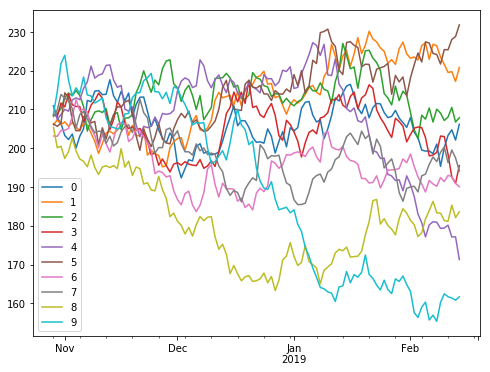

In [23]:
sim_closes.plot(figsize=(8,6));

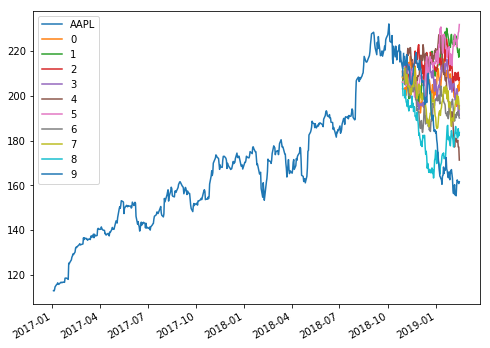

In [24]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [25]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL190215P00220000',
 'strike': 220.0,
 'currency': 'USD',
 'lastPrice': 20.99,
 'change': 8.19,
 'percentChange': 39.018578,
 'volume': 167,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1550188800,
 'lastTradeDate': 1541186986,
 'impliedVolatility': 1.0000000000000003e-05,
 'inTheMoney': True}

In [26]:
K=200  # strike price
ndays = 109 
nscen = 100000
dates = pd.date_range('2018-10-29', periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

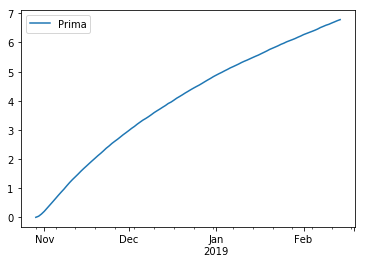

In [27]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(-sim_closes+strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();
#aqui es donde se le mete la ecacion BS put= -st+k

In [28]:
put.iloc[-1]

Prima    6.783
Name: 2019-02-14 00:00:00, dtype: float64

In [29]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL190215P00220000',
 'strike': 220.0,
 'currency': 'USD',
 'lastPrice': 20.99,
 'change': 8.19,
 'percentChange': 39.018578,
 'volume': 167,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1550188800,
 'lastTradeDate': 1541186986,
 'impliedVolatility': 1.0000000000000003e-05,
 'inTheMoney': True}

In [30]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(6.538818714971605, 7.027167587375306)
(6.538818714971605, 7.027167587375306)


### Análisis de la distribución de los rendimientos

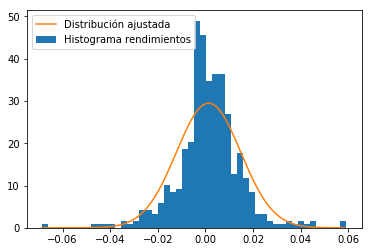

In [31]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

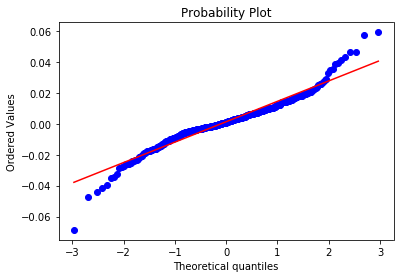

In [32]:
st.probplot(ren['AAPL'], dist='norm', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [33]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [34]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,99997,99998,99999
2018-10-29,0.008,3.933e-04,1.062e-02,...,0.011,3.933e-04,3.933e-04
2018-10-30,0.003,1.829e-02,5.506e-03,...,0.046,2.950e-03,5.506e-03
2018-10-31,0.008,-4.720e-03,-2.163e-03,...,-0.002,-1.495e-02,-1.239e-02
2018-11-01,0.026,-1.495e-02,-1.750e-02,...,0.013,5.506e-03,2.950e-03
2018-11-02,-0.025,8.063e-03,8.063e-03,...,0.021,-1.239e-02,-2.163e-03
...,...,...,...,...,...,...,...
2019-02-10,-0.002,5.919e-02,-2.163e-03,...,-0.007,-1.495e-02,-2.163e-03
2019-02-11,-0.005,-9.833e-03,3.933e-04,...,-0.007,5.506e-03,5.506e-03
2019-02-12,0.011,1.062e-02,2.950e-03,...,-0.005,-4.720e-03,2.950e-03
2019-02-13,0.016,-2.163e-03,4.641e-02,...,0.013,3.933e-04,5.506e-03


In [35]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,99997,99998,99999
2018-10-29,209.160,207.562,209.695,...,209.695,207.562,207.562
2018-10-30,209.778,211.393,210.853,...,219.657,208.175,208.708
2018-10-31,211.476,210.397,210.397,...,219.182,205.087,206.138
2018-11-01,217.037,207.276,206.747,...,222.089,206.219,206.747
2018-11-02,211.642,208.954,208.421,...,226.767,203.680,206.300
...,...,...,...,...,...,...,...
2019-02-10,292.366,296.885,225.833,...,259.265,252.721,246.972
2019-02-11,290.989,293.980,225.922,...,257.385,254.116,248.336
2019-02-12,294.096,297.119,226.590,...,256.173,252.919,249.069
2019-02-13,298.760,296.477,237.354,...,259.571,253.019,250.445


In [36]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,99997,99998,99999
2018-10-29,209.160,207.562,209.695,...,209.695,207.562,207.562
2018-10-30,209.778,211.393,210.853,...,219.657,208.175,208.708
2018-10-31,211.476,210.397,210.397,...,219.182,205.087,206.138
2018-11-01,217.037,207.276,206.747,...,222.089,206.219,206.747
2018-11-02,211.642,208.954,208.421,...,226.767,203.680,206.300
...,...,...,...,...,...,...,...
2019-02-10,292.366,296.885,225.833,...,259.265,252.721,246.972
2019-02-11,290.989,293.980,225.922,...,257.385,254.116,248.336
2019-02-12,294.096,297.119,226.590,...,256.173,252.919,249.069
2019-02-13,298.760,296.477,237.354,...,259.571,253.019,250.445


In [37]:
K=200
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

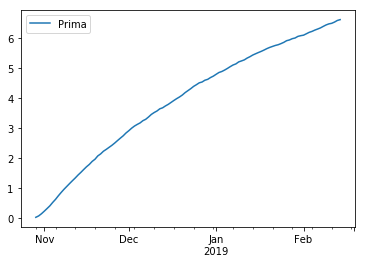

In [38]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(-sim_closes_hist+strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();
#aqui es donde se le mete la ecacion BS put= -st+k

In [39]:
put_hist.iloc[-1]

Prima    6.618
Name: 2019-02-14 00:00:00, dtype: float64

In [40]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL190215P00220000',
 'strike': 220.0,
 'currency': 'USD',
 'lastPrice': 20.99,
 'change': 8.19,
 'percentChange': 39.018578,
 'volume': 167,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1550188800,
 'lastTradeDate': 1541186986,
 'impliedVolatility': 1.0000000000000003e-05,
 'inTheMoney': True}

Intervalo de confianza del 95%

In [41]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(6.028516003844221, 7.207380829062172)
(6.028516003844221, 7.207380829062172)
